In [ ]:
#import dataset
from google.colab import files
uploaded = files.upload()

Saving train_preprocess.tsv.txt to train_preprocess.tsv.txt


In [ ]:
#import library for preprocessing data
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 8.1 MB/s 


In [ ]:
#labeling column
df = pd.read_table('/content/train_preprocess.tsv.txt')
df.columns = ['tweet', 'label']
df

,tweet,label
0,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
1,lokasi strategis di jalan sumatera bandung . t...,positive
2,betapa bahagia nya diri ini saat unboxing pake...,positive
3,duh . jadi mahasiswa jangan sombong dong . kas...,negative
4,"makanan beragam , harga makanan di food stall ...",positive
...,...,...
10994,tidak kecewa,positive
10995,enak rasa masakan nya apalagi kepiting yang me...,positive
10996,hormati partai-partai yang telah berkoalisi,neutral
10997,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [ ]:
df.shape

(10999, 2)

In [ ]:
df.isnull().sum()

tweet    0
label    0
dtype: int64

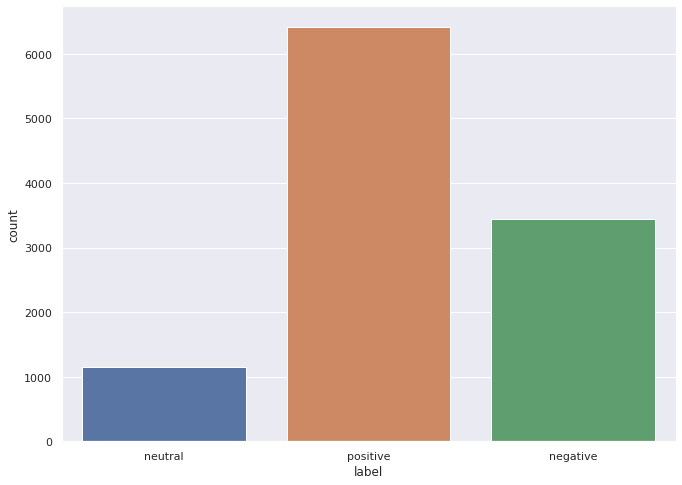

In [ ]:
sns.countplot(x='label', data=df);

In [ ]:
df['total_char_before_clean'] = df.tweet.apply(len)
df['total_word_before_clean']= df.tweet.apply(lambda sent: len(sent.split()))

In [ ]:
#stemming sudah dirunning, untuk mempersingkat waktu pengerjaan file telah disave jadi tidak perlu dirun ulang
def preprocess(sentence):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    tokens = word_tokenize(sentence)
    final = [stemmer.stem(tagged_word) for tagged_word in tokens]
    return " ".join(final)
df['tweet'] = df['tweet'].apply(preprocess)

In [ ]:
def cleaning(tweet):
  
  string = tweet.lower()
  string = re.sub(r'[^a-zA-Z]+', ' ', string)
  string = re.sub('0-9', ' ', string)
  
  return string
df['tweet'] = df['tweet'].apply(cleaning)

In [ ]:
stop_words = stopwords.words('indonesian')
reader = df['tweet']
reader = reader.apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [ ]:
pd.Series(" ".join(reader).split()).value_counts()

nya           13473
enak           3721
makanan        3587
makan          2844
harga          1988
              ...  
kaulah            1
tiau              1
ketionghua        1
yammie            1
foodlife          1
Length: 16267, dtype: int64

In [ ]:
other_stop_words = ['nya', 'orang', 'ya', 'pa', 'ai', 'sepe', 'sih']
df['tweet'] = reader.apply(lambda x: " ".join(word for word in x.split() if word not in other_stop_words))

In [ ]:
df.tweet.duplicated().sum()

217

In [ ]:
df['tweet'] = df.tweet.drop_duplicates()

In [ ]:
df.head()

,tweet,label,total_char_before_clean,total_word_before_clean
0,mohon ulama lurus k mmbri hujjah partai diwlh ...,neutral,102,17
1,lokasi strategis jalan sumatera bandung nyaman...,positive,184,33
2,betapa bahagia unboxing paket barang bagus men...,positive,93,17
3,duh mahasiswa sombong kasih kartu kuning belaj...,negative,214,38
4,makanan beragam harga makanan food stall kasir...,positive,161,28


In [ ]:
reader = reader.apply(word_tokenize)
shown_word = reader.apply(FreqDist)
print(shown_word)

0        {'mohon': 1, 'ulama': 1, 'lurus': 1, 'k': 1, '...
1        {'lokasi': 1, 'strategis': 1, 'jalan': 1, 'sum...
2        {'betapa': 1, 'bahagia': 1, 'nya': 2, 'unboxin...
3        {'duh': 1, 'mahasiswa': 2, 'sombong': 1, 'kasi...
4        {'makanan': 2, 'beragam': 1, 'harga': 1, 'food...
                               ...                        
10994                                        {'kecewa': 1}
10995    {'enak': 1, 'masakan': 1, 'nya': 2, 'kepiting'...
10996         {'hormati': 1, 'partai': 2, 'berkoalisi': 1}
10997    {'pagi': 2, 'tol': 1, 'pasteur': 1, 'macet': 1...
10998    {'belanja': 1, 'yogya': 1, 'riau': 1, 'junctio...
Name: tweet, Length: 10999, dtype: object


In [ ]:
df['tweet'] = df['tweet'].astype(str)

In [ ]:
df['total_char_after_clean'] = df.tweet.apply(len)
df['total_word_after_clean'] = df.tweet.apply(lambda sent: len(sent.split()))
df.head()

,tweet,label,total_char_before_clean,total_word_before_clean,total_char_after_clean,total_word_after_clean
0,mohon ulama lurus k mmbri hujjah partai diwlh ...,neutral,102,17,69,12
1,lokasi strategis jalan sumatera bandung nyaman...,positive,184,33,119,18
2,betapa bahagia unboxing paket barang bagus men...,positive,93,17,58,8
3,duh mahasiswa sombong kasih kartu kuning belaj...,negative,214,38,109,15
4,makanan beragam harga makanan food stall kasir...,positive,161,28,83,12


In [ ]:
df.groupby('label').describe()

total_char_before_clean                                               \
                           count        mean         std   min     25%    50%   
label                                                                           
negative                  3436.0  136.338475  103.639867   3.0   63.00  107.0   
neutral                   1148.0   88.914634   53.626624  10.0   56.75   74.0   
positive                  6415.0  234.907093  116.107195   4.0  145.00  220.0   

                       total_word_before_clean             ...  \
            75%    max                   count       mean  ...   
label                                                      ...   
negative  176.0  567.0                  3436.0  23.755821  ...   
neutral   103.0  413.0                  1148.0  14.733449  ...   
positive  333.0  557.0                  6415.0  41.097272  ...   

         total_char_after_clean        total_word_after_clean             \
                            75%    max                  count       mean   
label                                                                      
negative                   97.0  369.0                 3436.0  10.761641   
neutral                    72.0  233.0                 1148.0   8.741289   
positive                  176.0  337.0                 6415.0  18.707872   

                                                 
               std  min   25%   50%   75%   max  
label                                            
negative  7.647507  0.0   5.0   9.0  14.0  48.0  
neutral   5.067131  1.0   6.0   8.0  10.0  40.0  
positive  9.251034  1.0  12.0  17.0  25.0  53.0  

[3 rows x 32 columns]

In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


total_char_before_clean    160.0
total_word_before_clean     28.0
total_char_after_clean      90.0
total_word_after_clean      13.0
dtype: float64

In [ ]:
range_total_word = df.total_word_after_clean.max() - df.total_word_after_clean.min()
range_total_word

53

In [ ]:
range_total_char = df.total_char_after_clean.max() - df.total_char_after_clean.min()
range_total_char

369

In [ ]:
p0 = df.total_char_after_clean.min()
p100 = df.total_char_after_clean.max()
q1 = df.total_char_after_clean.quantile(0.25)
q2 = df.total_char_after_clean.quantile(0.50)
q3 = df.total_char_after_clean.quantile(0.75)
iqr = q3 - q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

print('batas bawah total char:', lower_limit)
print('nilai minimum', p0)
if lower_limit<p0:
  print("tidak ada outlier di sisi bawah")
else: 
  print('ada outlier dari sisi bawah')

print()

print('batas atas total char:', upper_limit)
print('nilai maximum', p100)
if upper_limit>p100:
  print('tidak ada outlier di sisi atas')
else:
  print('ada outlier dari sisi atas')

print()

batas bawah total char: -89.5
nilai minimum 0
tidak ada outlier di sisi bawah

batas atas total char: 290.5
nilai maximum 369
ada outlier dari sisi atas



In [ ]:
p0 = df.total_word_after_clean.min()
p100 = df.total_word_after_clean.max()
q1 = df.total_word_after_clean.quantile(0.25)
q2 = df.total_word_after_clean.quantile(0.50)
q3 = df.total_word_after_clean.quantile(0.75)
iqr = q3 - q1
lower_limit_word = q1-1.5*iqr
upper_limit_word = q3+1.5*iqr

print('batas bawah total word:', lower_limit)
print('nilai minimum', p0)
if lower_limit<p0:
  print("tidak ada outlier di sisi bawah")
else: 
  print('ada outlier dari sisi bawah')

print()

print('batas atas total word:', upper_limit)
print('nilai maximum', p100)
if upper_limit>p100:
  print('tidak ada outlier di sisi atas')
else:
  print('ada outlier dari sisi atas')

print()

batas bawah total word: -89.5
nilai minimum 0
tidak ada outlier di sisi bawah

batas atas total word: 290.5
nilai maximum 53
tidak ada outlier di sisi atas



In [ ]:
upper_char = np.where(df['total_char_after_clean'] >= upper_limit)
df.drop(upper_char[0], inplace = True)

In [ ]:
np.std(df)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


total_char_before_clean    120.215484
total_word_before_clean     21.044469
total_char_after_clean      64.671435
total_word_after_clean       9.274773
dtype: float64

In [ ]:
np.var(df)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


total_char_before_clean    14451.762609
total_word_before_clean      442.869674
total_char_after_clean      4182.394538
total_word_after_clean        86.021406
dtype: float64

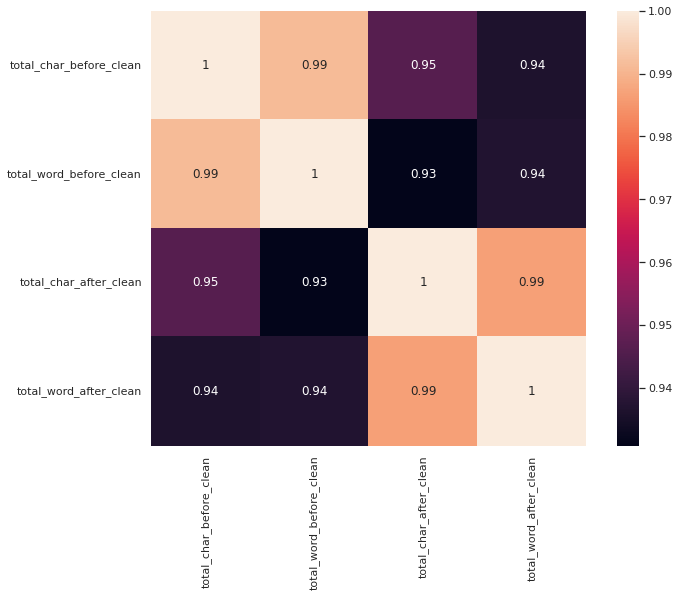

In [ ]:
matrix_cor = df.corr()
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(matrix_cor, square=True, annot=True)

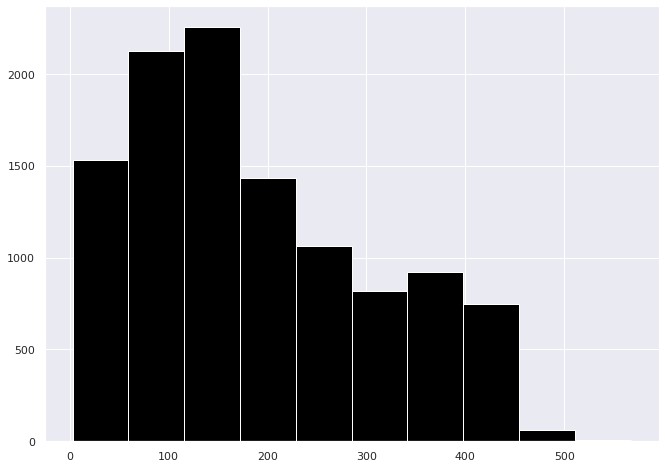

In [ ]:
df.total_char_before_clean.hist(color='black');

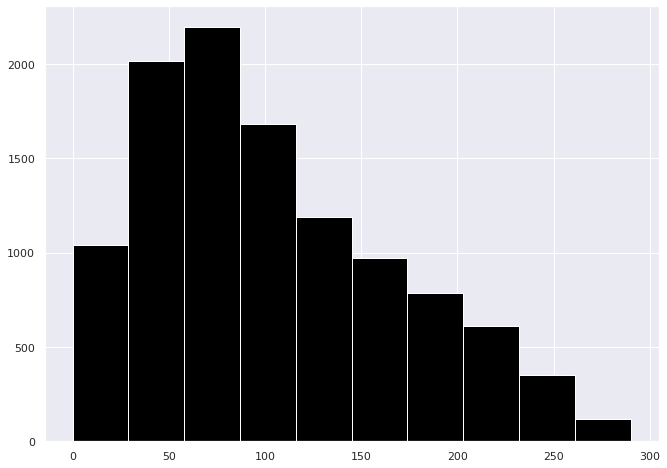

In [ ]:
df.total_char_after_clean.hist(color='black');

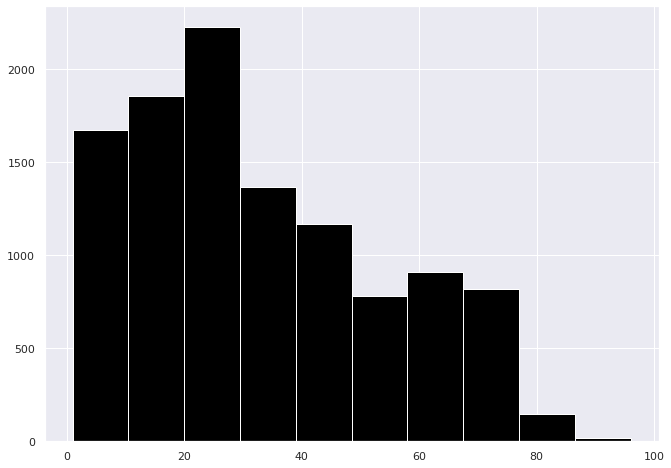

In [ ]:
df.total_word_before_clean.hist(color='black');

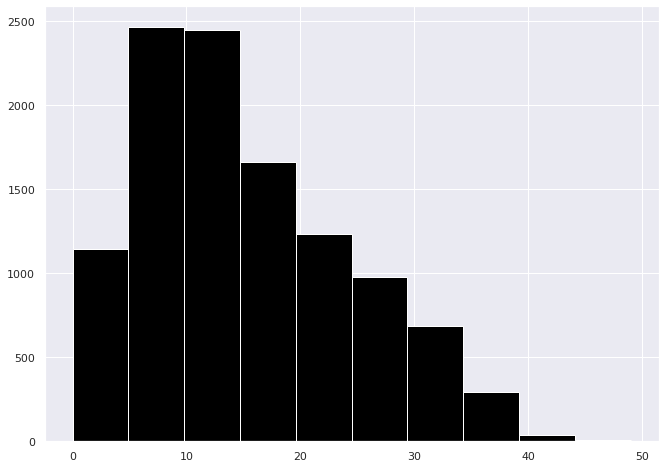

In [ ]:
df.total_word_after_clean.hist(color='black');

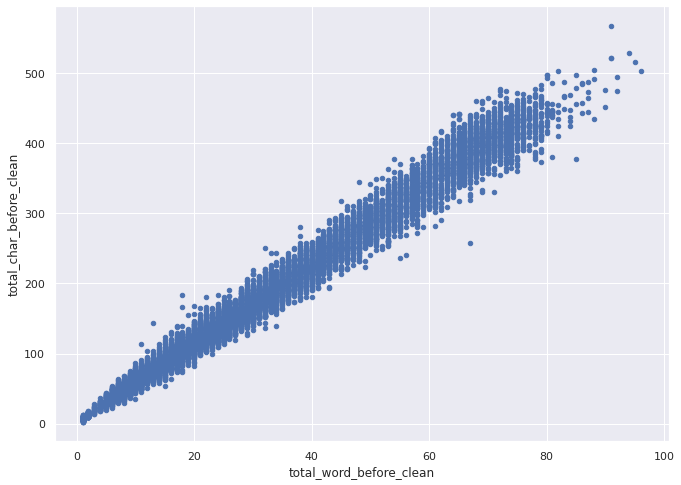

In [ ]:
df.plot(x='total_word_before_clean', y='total_char_before_clean', kind='scatter');

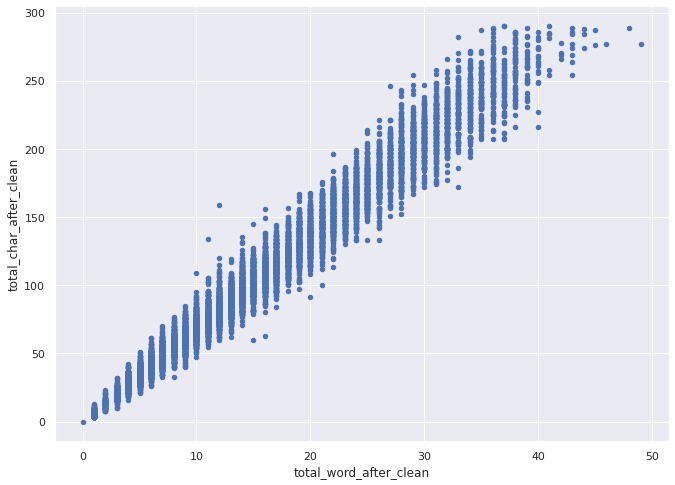

In [ ]:
df.plot(x='total_word_after_clean', y='total_char_after_clean', kind='scatter');

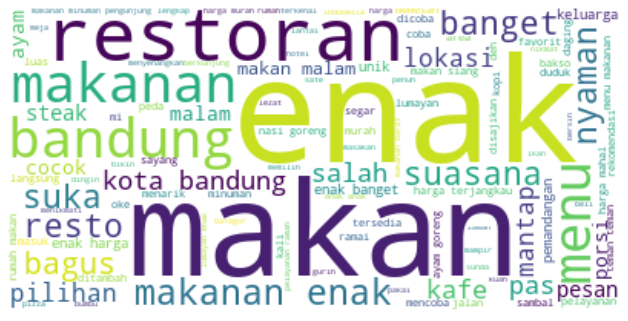

In [ ]:
from wordcloud import WordCloud
df_hs = df.loc[df['label']=='positive']

text = ' '.join(df_hs['tweet'])
wordcloud = WordCloud(background_color='white', max_words=200).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

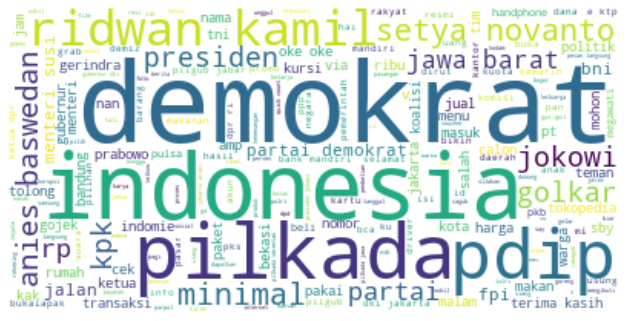

In [ ]:
from wordcloud import WordCloud
df_hs = df.loc[df['label']=='neutral']

text = ' '.join(df_hs['tweet'])
wordcloud = WordCloud(background_color='white', max_words=200).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

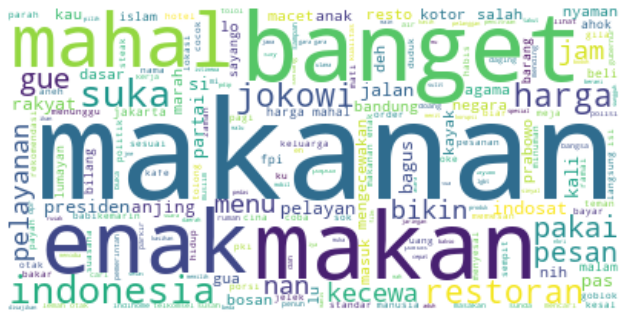

In [ ]:
from wordcloud import WordCloud
df_hs = df.loc[df['label']=='negative']

text = ' '.join(df_hs['tweet'])
wordcloud = WordCloud(background_color='white', max_words=200).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()